In [160]:
# Importando Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd #para geolocalización
from scipy import stats
from pandas_profiling import ProfileReport # infoHTML

In [161]:
# muestra gráficos
%matplotlib inline


In [207]:
# Leemos los datos seleccionados
df_main = pd.read_csv('../data/merged_data_cleaned.csv',index_col=0)

In [208]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1338
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Species                1339 non-null   object 
 1   Owner                  1332 non-null   object 
 2   Country.of.Origin      1338 non-null   object 
 3   Farm.Name              980 non-null    object 
 4   Lot.Number             276 non-null    object 
 5   Mill                   1021 non-null   object 
 6   ICO.Number             1182 non-null   object 
 7   Company                1130 non-null   object 
 8   Altitude               1113 non-null   object 
 9   Region                 1280 non-null   object 
 10  Producer               1107 non-null   object 
 11  Number.of.Bags         1339 non-null   int64  
 12  Bag.Weight             1339 non-null   object 
 13  In.Country.Partner     1339 non-null   object 
 14  Harvest.Year           1292 non-null   object 
 15  Grad

In [164]:
df_main.head(10)

,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromia,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,oromiya,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
9,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,"snnp/kaffa zone,gimbowereda",...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5


In [165]:
df_main.columns

Index(['Species', 'Owner', 'Country.of.Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner', 'Harvest.Year',
       'Grading.Date', 'Owner.1', 'Variety', 'Processing.Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Total.Cup.Points',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Generación de reporte HTML

In [166]:
profile = ProfileReport(df_main, title='Pandas Profiling Report', explorative=True)

In [15]:
# profile.to_file('../data/reports/merged_data_cleaned.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00,  4.90it/s]


Renombrar columnas a usar

In [209]:
df_main.rename(columns={'Country.of.Origin': 'Country_of_Origin',
       'ICO.Number':'ICO_number', 'Number.of.Bags': 'Number_of_Bags', 'Bag.Weight': 'Bag_Weight', 
       'Harvest.Year':'Harvest_Year', 'Grading.Date': 'Grading_Date', 'Owner.1':'Owner_1', 
       'Processing.Method': 'Processing_Method', 'Clean.Cup':'Clean_Cup','Cupper.Points':'Cupper_Points', 
       'Total.Cup.Points': 'Total_Cup_Points', 'Category.One.Defects':'Category_One_Defects',
       'Category.Two.Defects':'Category_Two_Defects', 'Certification.Body': 'Certification_Body',
       'Certification.Address':'Certification_Address', 'Certification.Contact': 'Certification_Contact'},inplace=True)

df_main.columns

Index(['Species', 'Owner', 'Country_of_Origin', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO_number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number_of_Bags', 'Bag_Weight', 'In.Country.Partner', 'Harvest_Year',
       'Grading_Date', 'Owner_1', 'Variety', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean_Cup', 'Sweetness', 'Cupper_Points', 'Total_Cup_Points',
       'Moisture', 'Category_One_Defects', 'Quakers', 'Color',
       'Category_Two_Defects', 'Expiration', 'Certification_Body',
       'Certification_Address', 'Certification_Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

Seleccion de variables a usar

In [210]:
columns_use = ['Species', 'Variety', 'Country_of_Origin',
       'Mill', 'ICO_number', 'Company', 'Region', 'Producer',
       'Number_of_Bags', 'Bag_Weight', 'Harvest_Year',
       'Grading_Date', 'Owner_1', 'Processing_Method', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',
       'Clean_Cup', 'Sweetness', 'Cupper_Points', 'Total_Cup_Points',
       'Moisture', 'Quakers', 'Color', 'Category_One_Defects',
       'Category_Two_Defects', 'Expiration', 'Certification_Body', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters', 'Altitude']

In [211]:
# Renombrar el dataframe con las variables a usar
df_main = df_main[columns_use]

## Preguntas de Exploración

### Calidad del café en tasa
1. Cuales son las 8 Especie de Café que más se siembran el mundo(Nuestra data tiene de Especie Arábica y Robusta)?
2. Cuanto es la humedad promedio por Especie y Variedad?
3. La altitud del café impacta con el sabor?
4. Cuales son las 3 ó 5 mejores variedades de café?
5. Cuales son los defecto de categoría 1 y 2 encontrados en los 3 ó 5 mejores variedades de café?
6. En que puesto se encuentra el café peruano en calidad?


Eliminando algunas variables

In [212]:
df_main[df_main['Country_of_Origin'].isna()].transpose()

,1197
Species,Arabica
Variety,NaN
Country_of_Origin,NaN
Mill,NaN
ICO_number,3-37-1980
Company,NaN
Region,NaN
Producer,NaN
Number_of_Bags,149
Bag_Weight,70 kg


In [213]:
# la fila ha sido eliminada porque tiene muchos valores vacíos y Total_Cup_Points está por debajo de 80 puntos
df_main.dropna(subset=['Country_of_Origin'],inplace=True)

ahora me queda 1338 filas

In [227]:
# función para gráficos para variable numérica

def diagnostic_numerico_plot(df, variable):
    # Define el tamaño de la grafica
    
    # Histograma
    plt.subplot(1,2,1)
    sns.histplot(df[variable], bins = 30)
    plt.title('Histograma')
    
    # Grafica de Caja
    plt.subplot(1,2,2)
    sns.boxplot(y=df[variable])
    plt.title('Grafico de Cajas')

    df[variable].info()


In [215]:
# función para gráfico para variables categóricas

def diagnostic_categorico_plot(df,variable,titulo_graf):
    df[variable].value_counts().plot(kind='barh',title=titulo_graf)


1. Cuales son las 8 Especie de Café que más se siembran el mundo(Nuestra data tiene de Especie Arábica y Robusta)?

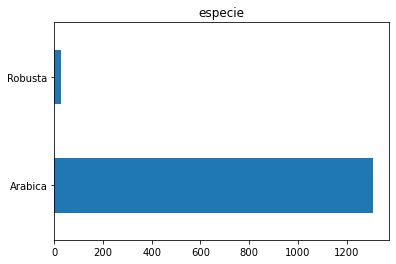

In [216]:
plt.figure(figsize = (6,4))
diagnostic_categorico_plot(df_main,'Species','especie')


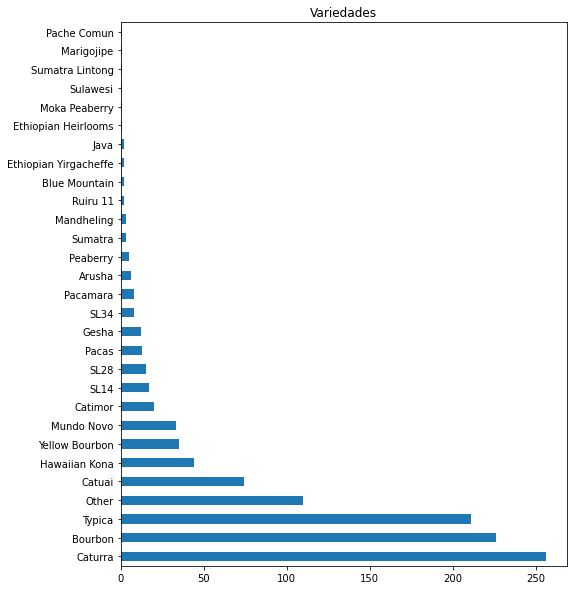

In [184]:
plt.figure(figsize = (8,10))
diagnostic_categorico_plot(df_main,'Variety','Variedades')

In [217]:
# Columnas relevantes para eliminar o remplazar outliers
columnas_analisis_outliers_nan = ['Species','Variety','Country_of_Origin','altitude_mean_meters','Total_Cup_Points']

Analisis para la columna "Variety" que contiene filas con NaN 

In [218]:
# Filtrar la puntuación del café(Total_Cup_Points) mayores a 80 que el catador contruye.
Total_Cup_Points_mayor80 = df_main[df_main.Total_Cup_Points >= 80 ][columnas_analisis_outliers_nan]
Total_Cup_Points_mayor80 

,Species,Variety,Country_of_Origin,altitude_mean_meters,Total_Cup_Points
0,Arabica,NaN,Ethiopia,2075.0,90.58
1,Arabica,Other,Ethiopia,2075.0,89.92
2,Arabica,Bourbon,Guatemala,1700.0,89.75
3,Arabica,NaN,Ethiopia,2000.0,89.00
4,Arabica,Other,Ethiopia,2075.0,88.83
...,...,...,...,...,...
1328,Robusta,NaN,Uganda,1600.0,80.92
1329,Robusta,NaN,Uganda,1745.0,80.58
1330,Robusta,NaN,Uganda,1200.0,80.50
1331,Robusta,NaN,India,750.0,80.17


In [219]:
# Filtrar del Dataframe anterior(Puntuación del cafe >=80) los valores NaN de la columna "Variety"
Total_Cup_Points_mayor80[Total_Cup_Points_mayor80['Variety'].isna()]

,Species,Variety,Country_of_Origin,altitude_mean_meters,Total_Cup_Points
0,Arabica,NaN,Ethiopia,2075.0,90.58
3,Arabica,NaN,Ethiopia,2000.0,89.00
5,Arabica,NaN,Brazil,NaN,88.83
7,Arabica,NaN,Ethiopia,1635.0,88.67
8,Arabica,NaN,Ethiopia,1635.0,88.42
...,...,...,...,...,...
1328,Robusta,NaN,Uganda,1600.0,80.92
1329,Robusta,NaN,Uganda,1745.0,80.58
1330,Robusta,NaN,Uganda,1200.0,80.50
1331,Robusta,NaN,India,750.0,80.17


Debido a que la cantidad de variedades con NaN es alta y se encuentran dentro de los mejores Puntuaciones le pondremos el valor de la categoría "other_2"

In [220]:
df_main['Variety'].replace(np.nan,"Other_2",inplace=True)

In [280]:
# eliminando NaNs
conteo_variedad_x_especie = (df_main[['Variety']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['Variety']).size() # Agrupo y cuento las obs. por intervalo de
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_variedad_x_especie_ordenado = conteo_variedad_x_especie.sort_values(by=['conteo'],ascending=False)

In [282]:
conteo_variedad_x_especie_ordenado = conteo_variedad_x_especie_ordenado[conteo_variedad_x_especie_ordenado.Variety!='Other']
conteo_variedad_x_especie_ordenado = conteo_variedad_x_especie_ordenado[conteo_variedad_x_especie_ordenado.Variety!='Other_2']
conteo_variedad_x_especie_ordenado.head(8)

,Variety,conteo
5,Caturra,256
2,Bourbon,226
28,Typica,211
4,Catuai,74
9,Hawaiian Kona,44
29,Yellow Bourbon,35
14,Mundo Novo,33
3,Catimor,20


Text(0.5, 0.98, 'Las 8 Variedades más sembradas en el mundo')

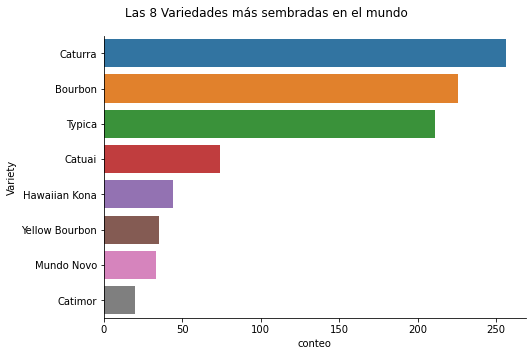

In [283]:
# Las 8 Variedades más sembradas en el mundo
graf_variedad_especie = sns.catplot(
    data=conteo_variedad_x_especie_ordenado.head(8), kind="bar",
    x="conteo", y="Variety", aspect=1.5
)

graf_variedad_especie.fig.subplots_adjust(top=0.9)
graf_variedad_especie.fig.suptitle('Las 8 Variedades más sembradas en el mundo')



Podemos Observar que las variedades que más se siembran el mundo son 
1. Caturra
2. Bourbon
3. Typica
4. Catuai
5. Hawaiian Kona
6. Yellow Bourbon
7. Mundo Novo
8. Catimor

1.1 Que países siembran más la variedad Caturra?

In [78]:
# 2. Variedad y Especie por país?

# eliminando NaNs
conteo_variedad_x_especie_pais = (df_main[['Variety', 'Species','Country_of_Origin']].dropna() # Seleccion de columna y elimino NaNs
                      .groupby(['Variety', 'Species','Country_of_Origin']).size() # Agrupo y cuento las obs. por intervalo de
                      .reset_index() # Convierte a df 
                      .rename({0: 'conteo'}, axis=1)) # Cambia el nombre de "0" a "conteo"
conteo_variedad_x_especie_pais.sort_values(by=['conteo'],ascending=False)

,Variety,Species,Country_of_Origin,conteo
103,Typica,Arabica,Mexico,137
31,Caturra,Arabica,Colombia,129
11,Bourbon,Arabica,Guatemala,119
106,Typica,Arabica,Taiwan,59
49,Hawaiian Kona,Arabica,United States (Hawaii),44
...,...,...,...,...
85,Pache Comun,Arabica,United States,1
86,Peaberry,Arabica,Kenya,1
55,Mundo Novo,Arabica,Japan,1
65,Other,Arabica,Laos,1


In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

In [23]:
world.head(15)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


<AxesSubplot:>

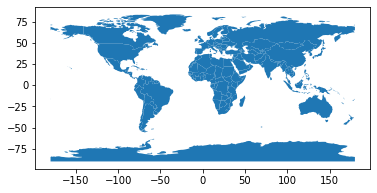

In [22]:
# world.plot()

<AxesSubplot:>

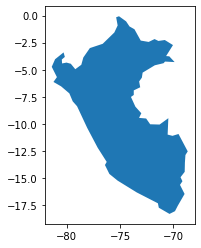

In [80]:
# Gráfico de Perú
graf_peru=world[world.name=='Peru'] # filtro de la data mundial df.name='Peru'
graf_peru.plot() # grafico